# DBSCAN clustering of hosts within subnet

In this notebook we are going to apply DBSCAN clustering algorithms on all hosts within our dataset

## Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

We are using pickled preprocessed dataframe of host network behaviour 

In [2]:
df = pd.read_pickle('balanced_preprocessed_dataset.pkl')
df.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                     ...            max                      \
                                     ...          Bytes                       
         07        08        09      ...             19        20        21   
0 -0.012616 -0.009572 -0.011851      ...      -0.015290 -0.014971 -0.016604   
1 -0.014340 -0.011510 -0.014119      ...      -0.015291 -0.014971 -0.016604   
2 -0.014320 -0.011545 -0.013922      ...      -0.015291 -0.014971 -0.016604   
3 -0.014341 -0.011979 -0.014230      ...      -0.015291 -0.014971 -0.016604   
4 -0.012538 -0.009441 -0.011706      ...      -0.015274 -0.014955 -0.016588   

                               Label  \
                               Label   
         22        23 anon_net_range   
0 -0.016766 -0.016320             28   
1 -0.016766 -0.016320             28   
2 -0.016766 -0.016320             28   
3 -0.016766 -0.016320             28   
4 -0.016752 -0.016307             26   

                                                              \
                                                               
                                          addr_range    unit   
0  ef160f55b36bd48b37f22bc9c48819b1a0259c2dd27ccc...  CEITEC   
1  93b8f5a052053b0db4731b671f78b8c5e5817d38d51ba9...  CEITEC   
2  ac600c8985d0f198d532737ea9d58db00905c6c6bebb6b...  CEITEC   
3  48bab257d30b1c6eaa225275fe60fc5e1dfe61afe54ace...  CEITEC   
4  1cd00c373ace404b829e822bf076631b564bf2bc70db82...  CEITEC   

                                                     Unit_encoding  
                                                                    
                                             subunit                
0   frontendy diskovych poli a aplikacni servery ...             0  
1   frontendy diskovych poli a aplikacni servery ...             0  
2   frontendy diskovych poli a aplikacni servery ...             0  
3   frontendy diskovych poli a aplikacni servery ...             0  
4                                                CRS             0  

[5 rows x 653 columns]

In [3]:
df['Label', 'Label', 'unit'].value_counts()

UVT              3500
SKM              3246
PrirF            2599
CEITEC           2223
LF               1475
FI               1289
FF               1089
FIeduroamnaFI    1020
FSS               802
PedF              740
UKB               649
ESF               554
PravF             536
RMU               429
FSpS              410
Teiresias         130
Telc               99
IBA                96
VPN                83
CTT                19
FNBrno              7
CESNET              3
Name: (Label, Label, unit), dtype: int64

In [4]:
df.shape

(20998, 653)

## Dataset preprocessing


## Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split

x = df[['mean', 'max', 'min']]
y = df['Unit_encoding']
x.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                   ...          min                      \
                                   ...        Bytes                       
         07        08        09    ...           14        15        16   
0 -0.012616 -0.009572 -0.011851    ...    -0.020730 -0.018019 -0.018878   
1 -0.014340 -0.011510 -0.014119    ...    -0.020752 -0.018040 -0.018899   
2 -0.014320 -0.011545 -0.013922    ...    -0.020752 -0.018040 -0.018899   
3 -0.014341 -0.011979 -0.014230    ...    -0.020752 -0.018040 -0.018899   
4 -0.012538 -0.009441 -0.011706    ...    -0.020322 -0.017750 -0.018128   

                                                                         
                                                                         
         17        18        19        20        21        22        23  
0 -0.021280 -0.015753 -0.015868 -0.017892 -0.022608 -0.020415 -0.022789  
1 -0.021301 -0.015771 -0.015889 -0.017910 -0.022626 -0.020430 -0.022810  
2 -0.021301 -0.015771 -0.015889 -0.017910 -0.022626 -0.020430 -0.022810  
3 -0.021301 -0.015771 -0.015889 -0.017910 -0.022626 -0.020430 -0.022810  
4 -0.021017 -0.015511 -0.015545 -0.017444 -0.022333 -0.020035 -0.022432  

[5 rows x 648 columns]

## DBSCAN parameters

### minpts

Try 50 as a starting point

In [6]:
minpts = 50

### epsilon

We are going to compute k-distances for each host using knn classifier, with **k** parameter se to **minpts**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
def get_k_distances(min_points):
    knn = KNeighborsClassifier(n_neighbors=min_points)
    knn.fit(x, y)
    distances, inds = knn.kneighbors(x, min_points) # returns k nearest distance for each datapoint
    distances = np.sort(distances.flatten('C')) # transform to 1-d array and sort in ascending order
    nrows = x.shape[0]
    start_ind = int((nrows * min_points) - ((nrows * min_points) / 300)) # plot only the last x distances to recognize knee
    distances = distances[start_ind::]
    fig = plt.figure(figsize=(12,10))
    plt.plot(distances)
    plt.ylabel('distance')
    plt.xlabel('index')
    plt.grid(b=True, which='major', axis='y')
    plt.title('KNN computed distance with k = ' + str(min_points))
    plt.show()

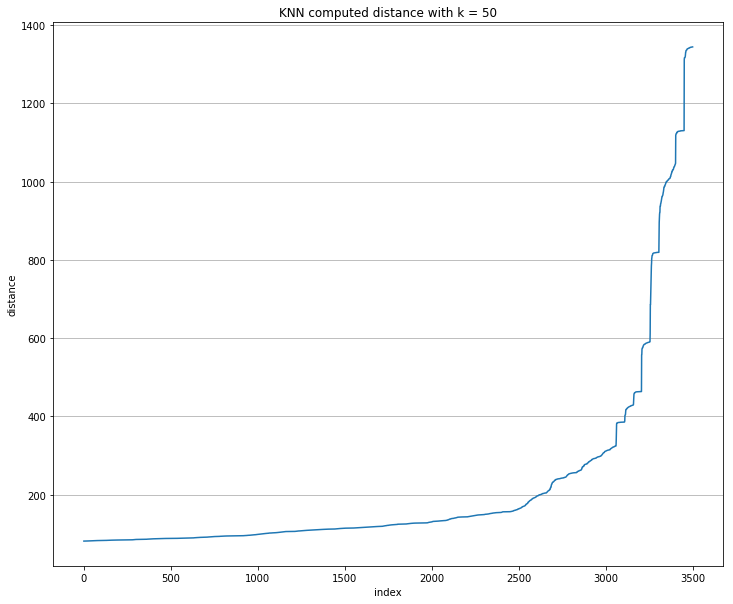

In [8]:
get_k_distances(minpts)

Knee of this graph is at around 300

In [9]:
eps = 300

## Apply DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=minpts)

### Performance evaluation

In [11]:
prediction = dbscan.fit_predict(x)
np.unique(prediction, return_counts=True)

(array([-1,  0]), array([    9, 20989]))

In [12]:
from sklearn import metrics

In [13]:
true_labels = df['Unit_encoding'].values
pred_labels = prediction

### ARI

In [14]:
score = metrics.adjusted_rand_score(true_labels, pred_labels) 
score

-1.734235356538021e-05

### Silhouette

In [15]:
silhouette = metrics.silhouette_score(x, pred_labels)
silhouette

0.9779261306528014

## Try to find higher performing parameters using gridsearch

In [16]:
params = { 'min_samples' : [5, 25, 50], 'eps' : [2, 4, 8, 16, 32, 64] }

In [17]:
def DBSCAN_Gridsearch(params):
    best_ari = -np.inf # highest achieved Adjuster Rand Index
    silhoutte_at_best = -np.inf # silhouette score at the best ari
    best_ms = -np.inf
    best_eps = -np.inf # dbscan parameters at best ARI
    for ms in params['min_samples']:
        for ep in params['eps']:
            dbscan = DBSCAN(eps=ep, min_samples=ms)
            prediction = dbscan.fit_predict(x)
            print('Params[ min_samples: ' + str(ms) + ', epsilon: ' + str(ep) + ' ]')
            print(np.unique(prediction, return_counts=True))
            score = metrics.adjusted_rand_score(true_labels, prediction)
            print("ARI: " + str(score))
            silhouette = metrics.silhouette_score(x, prediction)
            print("Silhouette: " + str(silhouette))
            print('--------------')
            if score > best_ari:
                best_ari = score
                best_ms = ms
                best_eps = ep
                silhouette_at_best = silhouette
    return best_ms, best_eps, best_ari, silhouette_at_best

In [18]:
best_ms, best_eps, best_ari, silhouette_at_best = DBSCAN_Gridsearch(params)

Params[ min_samples: 5, epsilon: 2 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([15662,  3284,    22,    77,     5,    49,   125,    53,    32,
          23,   364,   795,     5,    22,    10,     7,     7,     8,
           8,    15,     8,     6,    86,    14,    24,    12,    10,
           5,     5,     9,     9,    10,     7,     7,    11,    10,
          21,    23,     5,    16,     6,     5,     5,    28,     9,
          34,    17,     5,     5,     7,     6]))
ARI: 0.054833602266112495
Silhouette: -0.1878665898073125
--------------
Params[ min_samples: 5, epsilon: 4 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]), array([1

In [19]:
print("Best parameters: ")
print('Params[ min_samples: ' + str(best_ms) + ', epsilon: ' + str(best_eps) + ' ]')
print("ARI: " + str(best_ari))
print("Silhouette coefficient: " + str(silhouette_at_best))

Best parameters: 
Params[ min_samples: 5, epsilon: 4 ]
ARI: 0.08801698908892346
Silhouette coefficient: -0.17160416131940778


### More grid search with refined params table

In [20]:
params = { 'min_samples' : [40, 50, 60, 70, 80], 'eps' : [4, 5, 6, 8] }

In [21]:
best_ms, best_eps, best_ari, silhouette_at_best = DBSCAN_Gridsearch(params)

Params[ min_samples: 40, epsilon: 4 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), array([13634,   122,  5174,   479,   190,   968,   127,    50,   170,
          84]))
ARI: 0.07288316561855841
Silhouette: -0.06995248721349671
--------------
Params[ min_samples: 40, epsilon: 5 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6]), array([11447,  7387,    53,   695,   445,   693,   178,   100]))
ARI: 0.08498473811841097
Silhouette: -0.1331806262540938
--------------
Params[ min_samples: 40, epsilon: 6 ]
(array([-1,  0]), array([ 8514, 12484]))
ARI: 0.05978537661557063
Silhouette: 0.14845340575701585
--------------
Params[ min_samples: 40, epsilon: 8 ]
(array([-1,  0]), array([ 4287, 16711]))
ARI: 0.0016019779752438304
Silhouette: 0.3078224078354312
--------------
Params[ min_samples: 50, epsilon: 4 ]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]), array([13770,  5130,   466,   118,   183,   966,   111,   170,    84]))
ARI: 0.07228726112095059
Silhouette: -0.07336045858459901
--------------
Para

In [22]:
print("Best parameters: ")
print('Params[ min_samples: ' + str(best_ms) + ', epsilon: ' + str(best_eps) + ' ]')
print("ARI: " + str(best_ari))
print("Silhouette coefficient: " + str(silhouette_at_best))

Best parameters: 
Params[ min_samples: 40, epsilon: 5 ]
ARI: 0.08498473811841097
Silhouette coefficient: -0.1331806262540938
